<a href="https://colab.research.google.com/github/RabeenaRasulla/CodSoft-Task/blob/main/TASK_2_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2 : MOVIE RATING PREDICTION

Author : Rabeena R

Batch : December (A95)

Domain : Data Science

Aim : Build a model that predicts the rating based on features like genre, director, and actors.

IMPORTING IMPORTANT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

DOWNLOADING DATASET

**movie_data**

In [3]:
df_movie=pd.read_csv('/content/IMDb Movies India.csv',encoding= 'latin-1')
df_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df_movie.shape

(15509, 10)

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df_movie.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df_movie.dropna(subset=["Rating"],inplace =True)
df_movie.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
df_movie.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [ ]:
df_movie.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df_movie['Votes']=df_movie['Votes'].astype(str).str.replace(',','').astype(int)
df_movie['Year']=df_movie['Year'].astype(str).str.strip('()').astype(int)
df_movie['Duration']=df_movie['Duration'].astype(str).str.strip('min')
df_movie['Duration']=pd.to_numeric(df_movie['Duration'],errors='coerce')
df_movie['Duration'].fillna(df_movie['Duration'].median(),inplace=True)
df_movie.isnull().sum()

<ipython-input-92-cee48afde10e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movie['Duration'].fillna(df_movie['Duration'].median(),inplace=True)


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [ ]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
top_movie=df_movie.sort_values(by=['Rating'],ascending=False).head(10)
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,(2017),NaN,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


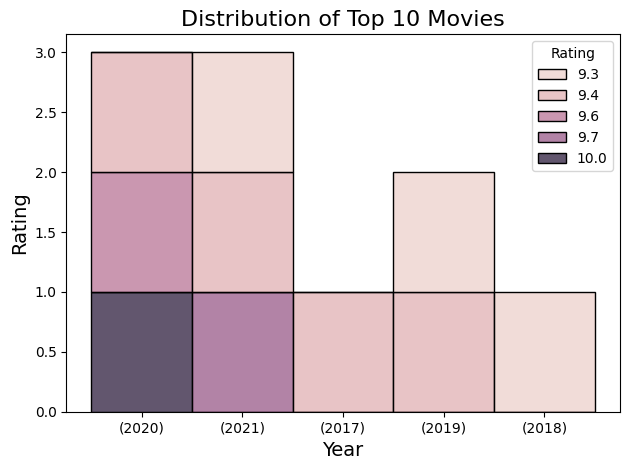

In [ ]:
top_movie = df_movie.sort_values(by=['Rating'], ascending=False).head(10)
sns.histplot(data=top_movie,x="Year",hue="Rating",multiple="stack")
plt.title('Distribution of Top 10 Movies',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
genre_counts = df_movie['Genre'].value_counts().reset_index()
genre_counts.columns =['Genre','count']
top_n_genres =genre_counts.head(5)
top_n_genres

,Genre,count
0,Drama,1177
1,"Drama, Romance",447
2,"Action, Crime, Drama",417
3,Action,417
4,"Drama, Family",291


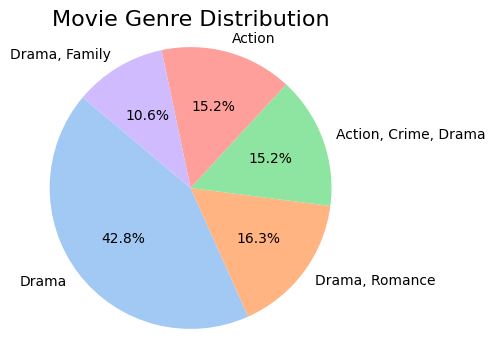

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(top_n_genres['count'],labels=top_n_genres['Genre'],autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution',fontsize=16)
plt.axis('equal')
plt.show()


In [ ]:
director_avg_rating=df_movie.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating=director_avg_rating.sort_values(by='Rating',ascending=False)
top_directors=director_avg_rating.head(10)
top_directors

,Director,Rating
2385,Saif Ali Sayeed,10.0
2720,Sriram Raja,9.7
538,Bobby Kumar,9.6
348,Arvind Pratap,9.4
363,Ashish Dubey,9.4
2763,Suhrud Godbole,9.4
1611,Munni Pankaj,9.4
2984,Venkatesh Bk,9.3
3080,Vishwa Bhanu,9.3
1987,Raghav Jairath,9.3


<ipython-input-14-7d08aa4fcec3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors,y='Rating',x='Director',palette='viridis') # Changed 'Directer' to 'Director'


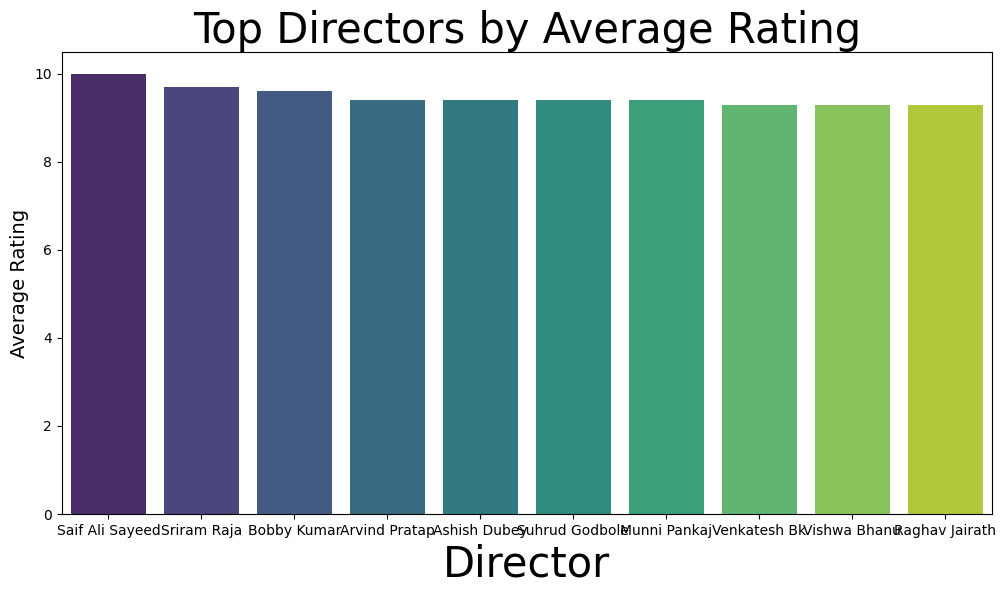

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_directors,y='Rating',x='Director',palette='viridis') # Changed 'Directer' to 'Director'
plt.title('Top Directors by Average Rating',fontsize=30)
plt.ylabel('Average Rating',fontsize=14)
plt.xlabel('Director',fontsize=30)
plt.show()

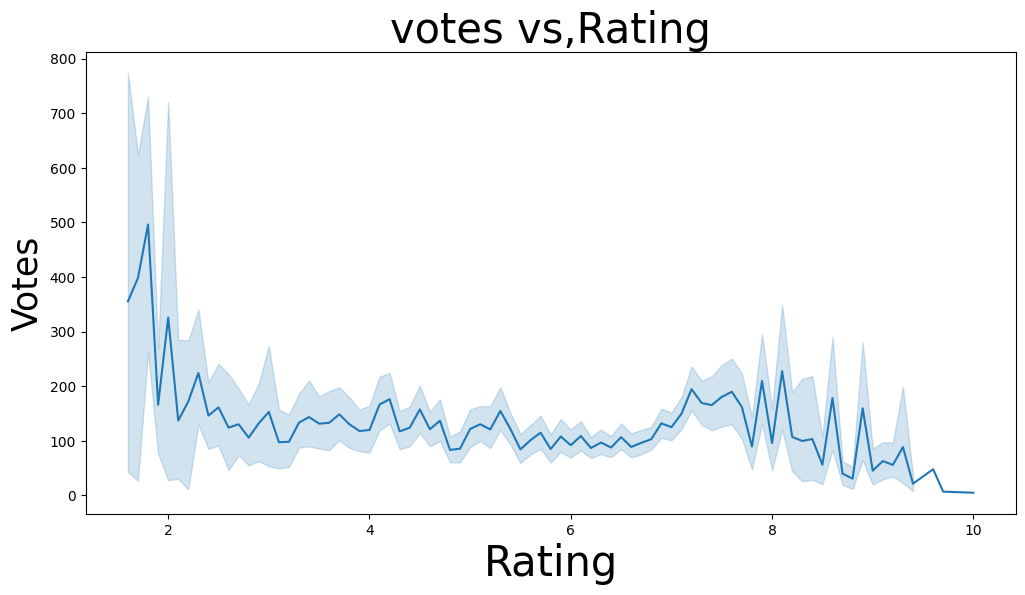

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_movie,x='Rating',y='Votes')
plt.title('votes vs,Rating',fontsize=30)
plt.xlabel('Rating',fontsize=30)
plt.ylabel('Votes',fontsize=25)
plt.show()

In [ ]:
actor_count=df_movie['Actor 1'].value_counts().reset_index()
actor_count.columns=['Actor','MovieCount']
top_n_actors= actor_count.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,117
6,Dev Anand,91
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


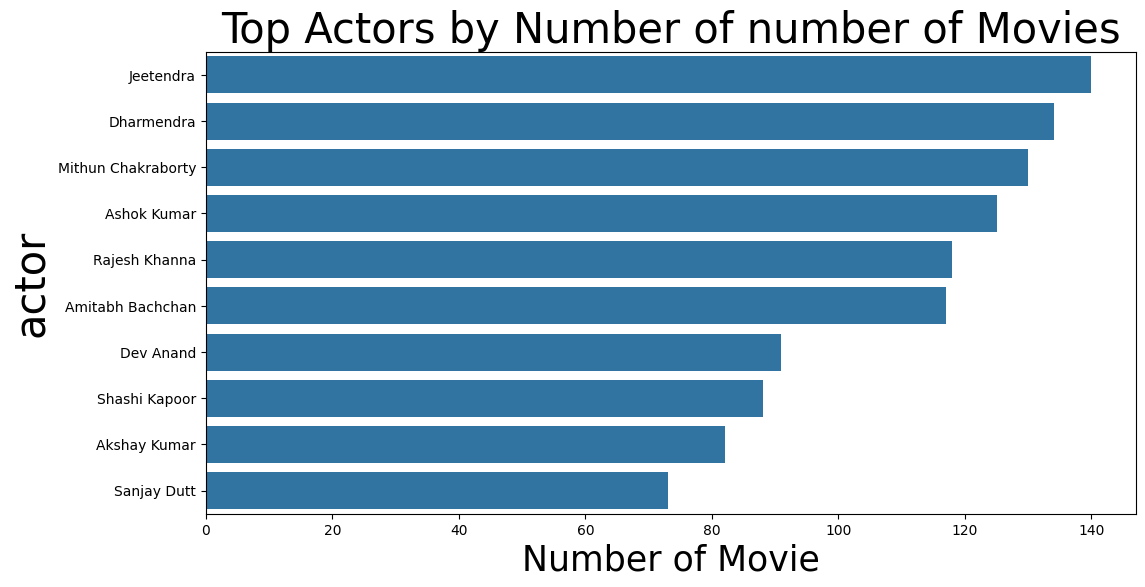

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_n_actors,x='MovieCount',y='Actor',orient='h')
plt.title('Top Actors by Number of number of Movies',fontsize=30)
plt.xlabel('Number of Movie',fontsize=25)
plt.ylabel('actor',fontsize=30)
plt.show()

In [ ]:
yearly_movie_counts=df_movie['Year'].value_counts().reset_index()
yearly_movie_counts.columns=['Year','MovieCount']
yearly_movie_counts=yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,(1917),1
90,(1931),3
86,(1932),6
87,(1933),5
88,(1934),5
...,...,...
1,(2017),236
2,(2018),228
0,(2019),249
9,(2020),167


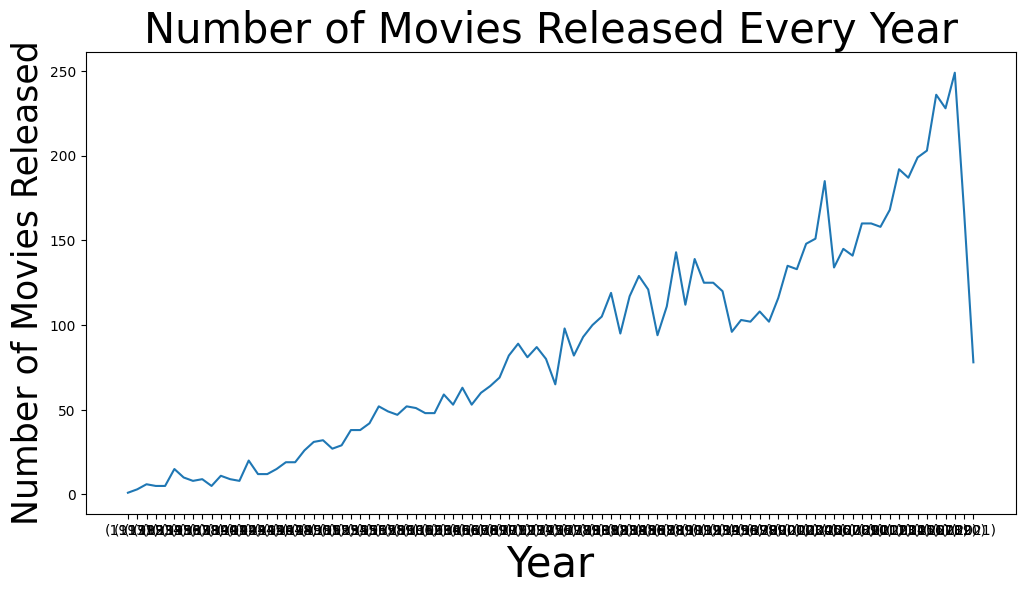

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount') # Changed 'MoviesCount' to 'MovieCount'
plt.title('Number of Movies Released Every Year', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Number of Movies Released', fontsize=25)
plt.show()

In [21]:
filtered_df = df_movie[(df_movie['Rating'] > 8) & (df_movie['Votes'] > 1000)] # Corrected column name from 'ating' to 'Rating'
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


<ipython-input-45-ccfac9b561ba>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')


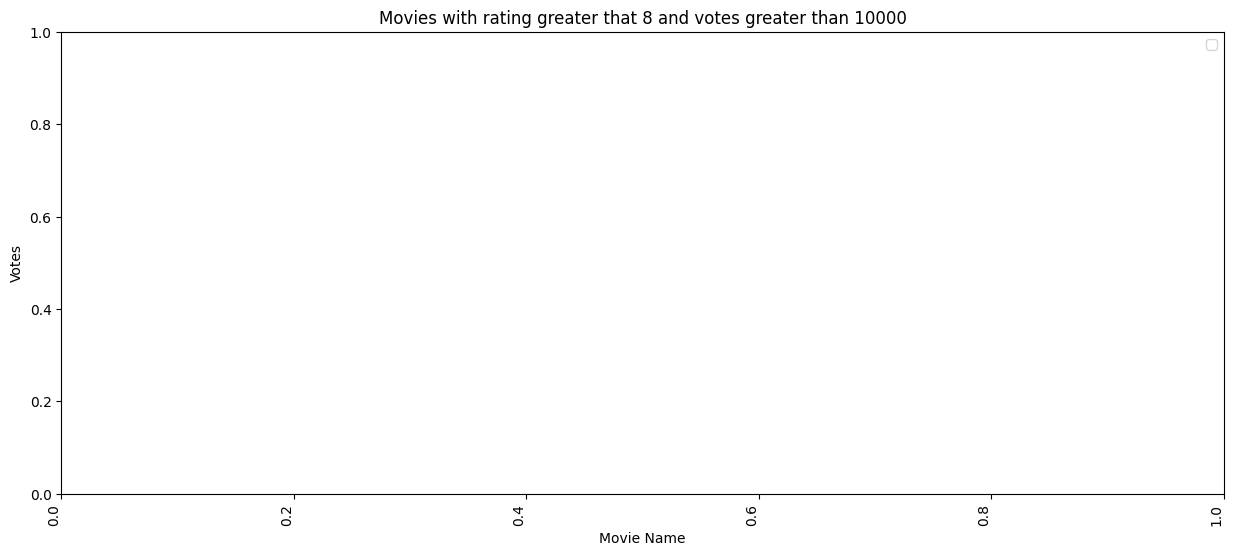

In [45]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted') # Changed 'name' to 'Name'
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater that 8 and votes greater than 10000')
plt.show()

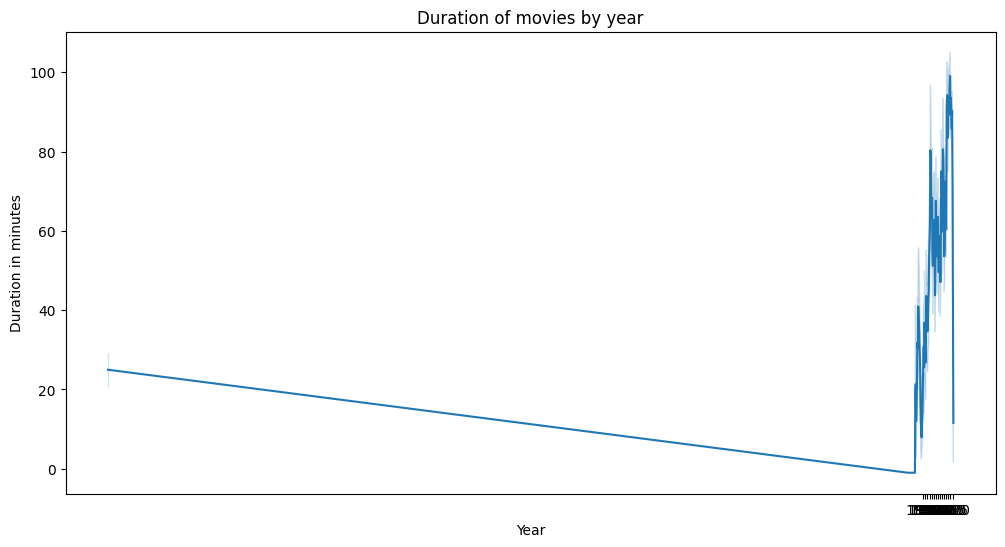

In [52]:

df_movie['Year'] = df_movie['Year'].astype(str).str.replace(r'\D+', '', regex=True)
# Replace empty strings with NaN before converting to int
df_movie['Year'] = pd.to_numeric(df_movie['Year'], errors='coerce').fillna(0).astype(int)
# Remove any non-digit characters from the 'Duration' column before converting to int
df_movie['Duration'] = df_movie['Duration'].astype(str).str.replace(r'\D+', '', regex=True)
# Replace empty strings with -1 before converting to int
df_movie['Duration'] = pd.to_numeric(df_movie['Duration'], errors='coerce').fillna(-1).astype(int)
#df_movie['Year'] =  df_movie['Year'].astype(int)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_movie,x='Year',y='Duration')
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1950,2023,5))
plt.show()

In [54]:

df_movie['Genre'] = df_movie['Genre'].astype(str)
df_movie['Genre'] = df_movie['Genre'].str.split(',')
genre_df = df_movie.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,-1,nan,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,nan,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,nan,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,nan,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,nan,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,-1,nan,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,nan,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,-1,nan,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,-1,nan,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-56-cb16e6bdc1d5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')


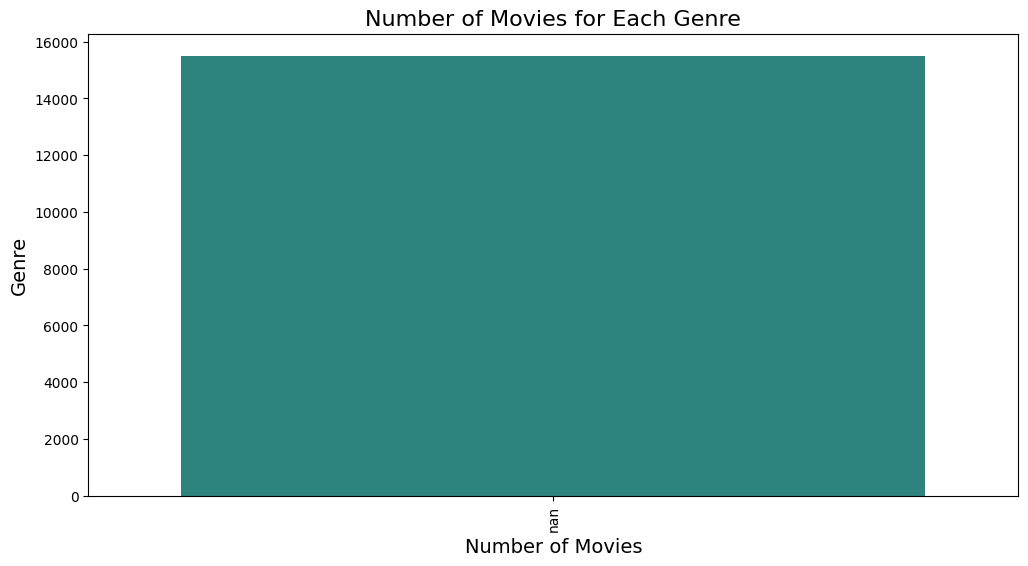

In [56]:
plt.figure(figsize=(12,6))
# Get the unique genres and their counts
genre_counts = genre_df['Genre'].value_counts()
# Get the unique genre labels
unique_genres = genre_counts.index
# Plot the countplot with unique genres as order
# Changed 'paletter' to 'palette'
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [57]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_ratinng_by_genre = average_rating_by_genre.sort_values(by='Rating',ascending=False)

<ipython-input-59-d08699be3b89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre, y="Rating",x='Genre',palette='coolwarm')


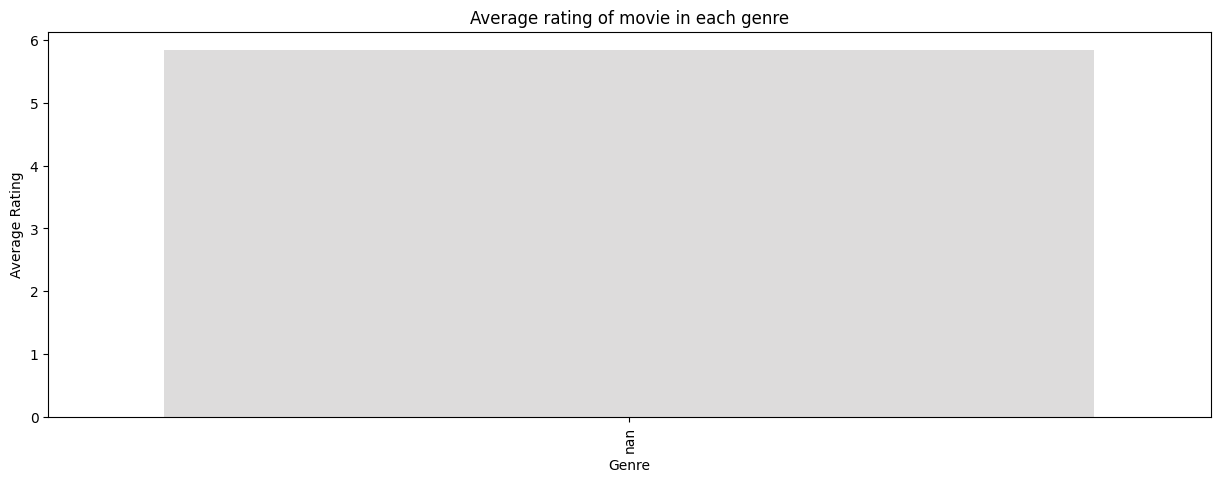

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre, y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movie in each genre')
plt.xticks(rotation=90)
plt.show()

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = df_movie.drop(['Name'], axis=1)

trans_data['Director'] = labelencoder.fit_transform(df_movie['Director'])

trans_data['Actor 1'] = labelencoder.fit_transform(df_movie['Actor 1'])

trans_data['Actor 2'] = labelencoder.fit_transform(df_movie['Actor 2'])

trans_data['Actor 3'] = labelencoder.fit_transform(df_movie['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df_movie['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,-1,0,NaN,NaN,1926,2250,800,3108
1,2019,109,0,7.0,8.0,1548,3280,4790,527
2,2021,90,0,NaN,NaN,5123,3713,2866,3450
3,2019,110,0,4.4,35.0,3319,2917,1504,4020
4,2010,105,0,NaN,NaN,385,3112,3462,405


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

sc_data= scaler.fit_transform(trans_data)

sc_df = pd.DataFrame (sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.000000,0.000000,0.0,NaN,NaN,0.324352,0.476897,0.163566,0.644813
1,0.998516,0.341615,0.0,0.662921,0.003018,0.260694,0.695210,0.979350,0.109336
2,0.999505,0.282609,0.0,NaN,NaN,0.862748,0.786986,0.585974,0.715768
3,0.998516,0.344720,0.0,0.370787,0.030181,0.558942,0.618270,0.307504,0.834025
4,0.994065,0.329193,0.0,NaN,NaN,0.064837,0.659602,0.707831,0.084025


In [67]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Duration,0.092606
Actor 3,0.060049
Actor 2,0.059205
Actor 1,0.039774
Director,-0.008283
Votes,-0.009195
Year,-0.166673
Genre,NaN


<Axes: >

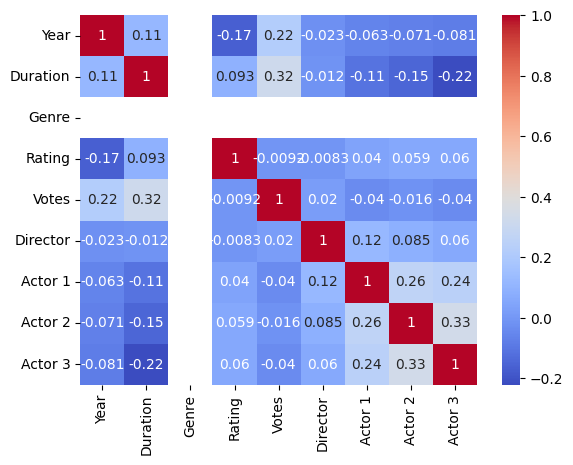

In [68]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm')

In [72]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [91]:
X = trans_data.drop(['Rating'], axis=1)


In [94]:
y=trans_data['Rating']


In [95]:
x_train.dropna(inplace=True)
y_train = y_train[x_train.index]
model.fit(x_train, y_train)

LinearRegression()

In [99]:
X_test = np.array(X_test)
x_test


,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
11115,0,-1,0,NaN,3243,4718,4891,4820
2921,2017,123,0,15.0,3771,2510,3421,4726
3463,1941,-1,0,NaN,19,4718,4891,4820
2495,1949,-1,0,NaN,1061,847,921,4457
15263,2005,-1,0,NaN,5938,4718,4891,4820
...,...,...,...,...,...,...,...,...
11391,1987,-1,0,15.0,4067,3633,3949,4063
14647,0,74,0,NaN,3266,460,4891,4820
7238,2000,71,0,NaN,317,3760,4891,4820
8747,1941,-1,0,NaN,880,3432,2780,1584


In [105]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(x_train)
X_test = imputer.transform(X_test)

# Now you can fit your model and make predictions:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [117]:
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Assuming 'df_movie' is your DataFrame
# ... (Your previous code for loading and cleaning data) ...

# Ensure all columns used are of numeric type
for col in ['Year', 'Duration', 'Votes', 'Rating']:
    df_movie[col] = pd.to_numeric(df_movie[col], errors='coerce')

# Impute missing values in numerical columns
numerical_cols = ['Year', 'Duration', 'Votes', 'Rating']
imputer = SimpleImputer(strategy='mean')
df_movie[numerical_cols] = imputer.fit_transform(df_movie[numerical_cols])


# Label encode categorical columns
categorical_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']
for col in categorical_cols:
    df_movie[col] = df_movie[col].astype(str)  # Ensure string type for encoding
    df_movie[col] = LabelEncoder().fit_transform(df_movie[col])

# Split data into training and testing sets
X = df_movie.drop(['Rating', 'Name'], axis=1)  # Exclude 'Name' from features
y = df_movie['Rating']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Impute missing values (if any remain) in training and testing sets
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Model Training & Evaluation
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Remove NaN values from y_test and y_pred
y_test = y_test[~np.isnan(y_pred)]
y_pred = y_pred[~np.isnan(y_pred)]

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.003724317086960416
Mean squared error: 0.9588928025208492
Mean absolute error: 0.5962203544776433


In [119]:
print(y_test)

11115    5.841621
2921     6.800000
3463     5.841621
2495     5.841621
15263    5.841621
           ...   
6434     5.100000
14615    8.200000
12250    5.841621
4139     4.300000
4679     5.841621
Name: Rating, Length: 3102, dtype: float64
